In [105]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns


# Data Preparation

In [35]:
df =  pd.read_csv('data\Churn_Modelling.csv')
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [37]:

df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [38]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [39]:
print(f"Data count: {df.shape[0]}")

print(f"Class count: {df['Exited'].nunique()}")

print(f"distribution of classes:\n {df['Exited'].value_counts()}")

print(f"classes are 100th percentile\n {df['Exited'].value_counts(normalize=True)*100}")

Data count: 10000
Class count: 2
distribution of classes:
 Exited
0    7963
1    2037
Name: count, dtype: int64
classes are 100th percentile
 Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


Firstly drop the RowNumber coloumn. Because  it is not necessary and not meaningful for ann. Just index

In [40]:
df.drop("RowNumber", inplace=True, axis=1)
print(df.head())

   CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Female   42       2   
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    France  Female   42       8   
3    15701354      Boni          699    France  Female   39       1   
4    15737888  Mitchell          850     Spain  Female   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0  


In this step, CustomerID and Surname columns are not meaningful too

In [41]:
df.drop({"Surname", "CustomerId"}, inplace=True, axis=1)
print(df.head())

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  


In [42]:
df.shape

(10000, 11)

Now we can take care of outliers. Outliers just can control in numerical data  I usually use IQR methods.

This data set has categorical and numerical columns. Let's see

In [43]:
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
num_cols = [col for col in df.columns if df[col].dtypes != "O"]
print("Categorical columns: ", cat_cols)
print("Numerical columns: ", num_cols)


Categorical columns:  ['Geography', 'Gender']
Numerical columns:  ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


I want to see the values before and after deleting the outlier. We have seen it in the 'describe' method, but let's see the min max and average value again.

In [104]:
def aggFunc(num_cols):
  for c in num_cols:
    sonuclar = df[c].agg(['max', 'min', 'mean'])
    print(f"{c}")
    print("En Yüksek Değer: ", sonuclar['max'])
    print("En Düşük Değer: ", sonuclar['min'])
    print("Ortalama Değer: ", sonuclar['mean'])
    print("-" * 20) 
def boxplot(num_cols):
  for col in num_cols:
    print(col)
    df[col].hist(bins=20)
    plt.xlabel(col)
    plt.title(col)
    plt.show(block=True)

In [103]:
aggFunc(num_cols)

CreditScore
En Yüksek Değer:  850.0
En Düşük Değer:  350.0
Ortalama Değer:  650.2028258421215
--------------------
Age
En Yüksek Değer:  68.0
En Düşük Değer:  18.0
Ortalama Değer:  38.26640728985359
--------------------
Tenure
En Yüksek Değer:  10.0
En Düşük Değer:  0.0
Ortalama Değer:  5.010238558410975
--------------------
Balance
En Yüksek Değer:  250898.09
En Düşük Değer:  0.0
Ortalama Değer:  76499.14588512336
--------------------
NumOfProducts
En Yüksek Değer:  3.0
En Düşük Değer:  1.0
Ortalama Değer:  1.515204259240299
--------------------
HasCrCard
En Yüksek Değer:  1.0
En Düşük Değer:  0.0
Ortalama Değer:  0.7053342889321184
--------------------
IsActiveMember
En Yüksek Değer:  1.0
En Düşük Değer:  0.0
Ortalama Değer:  0.5087539674413842
--------------------
EstimatedSalary
En Yüksek Değer:  199992.48
En Düşük Değer:  11.58
Ortalama Değer:  100087.2008067984
--------------------
Exited
En Yüksek Değer:  1.0
En Düşük Değer:  0.0
Ortalama Değer:  0.2006757448551244
-------------

CreditScore


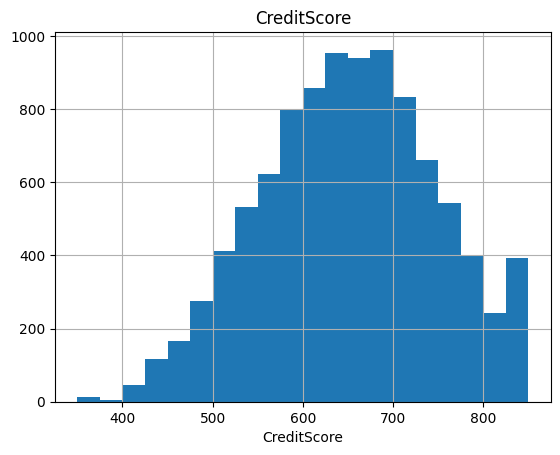

Age


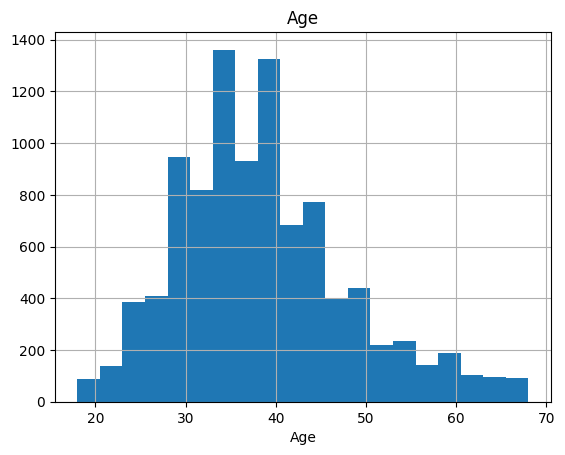

Tenure


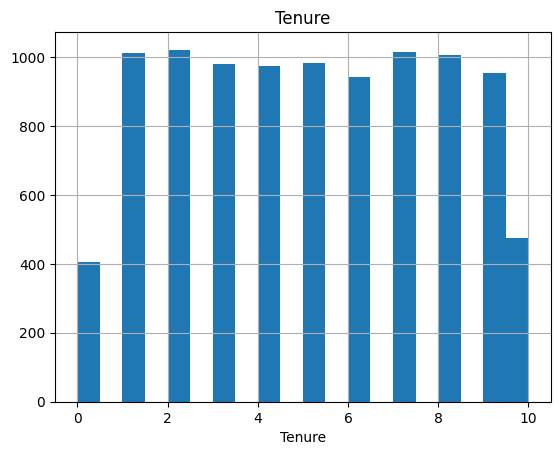

Balance


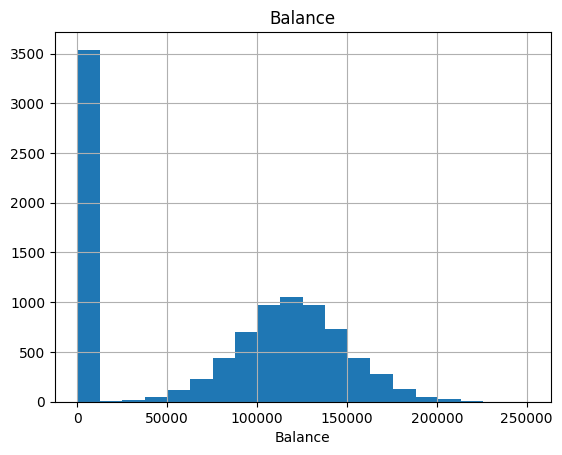

NumOfProducts


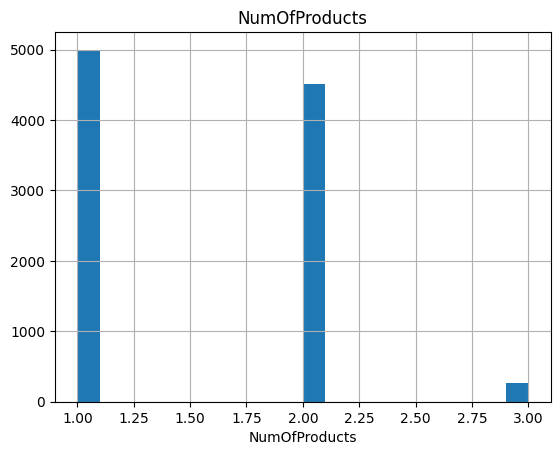

HasCrCard


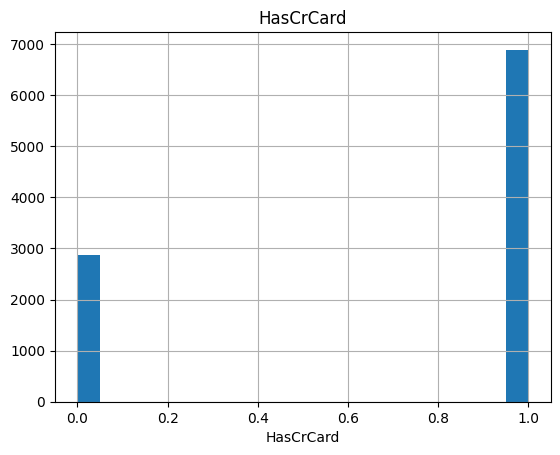

IsActiveMember


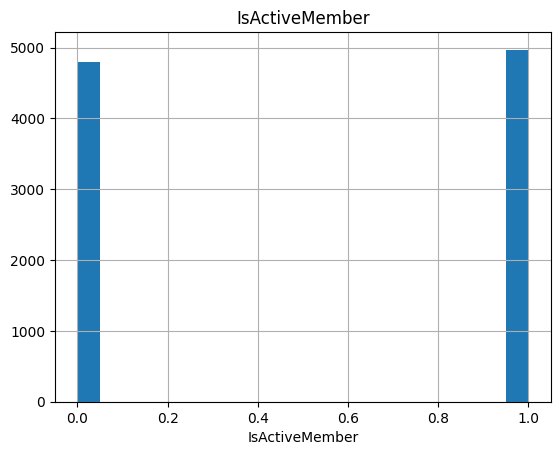

EstimatedSalary


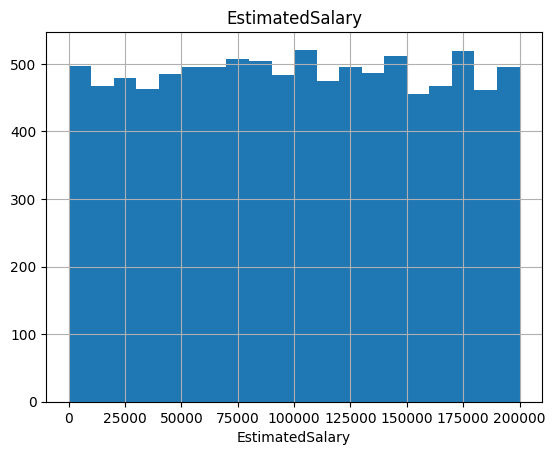

Exited


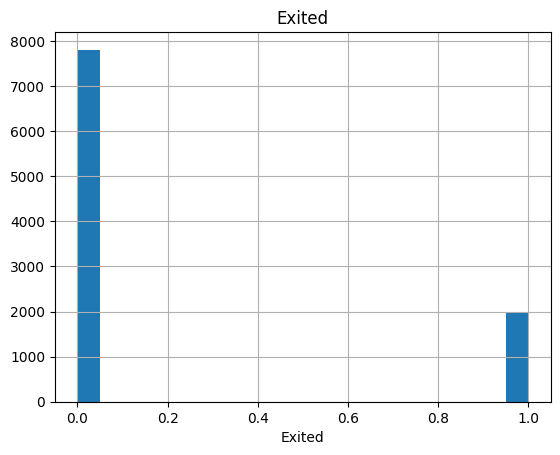

In [102]:

boxplot(num_cols)

In [45]:
def outlier_thresholds(dataframe, col_name, q1=0.20, q3=0.80):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

for col in num_cols:
    df = remove_outlier(df, col)
    print(df)


      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0   

In [46]:
df.shape 
#.05 & .95 (10000,11) - .20 & .80 (9767, 11) - .25 & .75 (7677, 11)
# I prefer .20 & .80 (9767, 11)

(9767, 11)

In [47]:
aggFunc(num_cols)
boxplot(num_cols)

CreditScore
En Yüksek Değer:  850.0
En Düşük Değer:  350.0
Ortalama Değer:  650.2028258421215
--------------------
Age
En Yüksek Değer:  68.0
En Düşük Değer:  18.0
Ortalama Değer:  38.26640728985359
--------------------
Tenure
En Yüksek Değer:  10.0
En Düşük Değer:  0.0
Ortalama Değer:  5.010238558410975
--------------------
Balance
En Yüksek Değer:  250898.09
En Düşük Değer:  0.0
Ortalama Değer:  76499.14588512336
--------------------
NumOfProducts
En Yüksek Değer:  3.0
En Düşük Değer:  1.0
Ortalama Değer:  1.515204259240299
--------------------
HasCrCard
En Yüksek Değer:  1.0
En Düşük Değer:  0.0
Ortalama Değer:  0.7053342889321184
--------------------
IsActiveMember
En Yüksek Değer:  1.0
En Düşük Değer:  0.0
Ortalama Değer:  0.5087539674413842
--------------------
EstimatedSalary
En Yüksek Değer:  199992.48
En Düşük Değer:  11.58
Ortalama Değer:  100087.2008067984
--------------------
Exited
En Yüksek Değer:  1.0
En Düşük Değer:  0.0
Ortalama Değer:  0.2006757448551244
-------------

This is how we have seen the differences more clearly.

it's time to look at the missing data.

In [48]:
df.isnull().values.any()
#False. That is good :D


False

By the way some numerical columns can act like categorical data. Normally we should control them but this time I will not do anything about that.

##### Now we convert categorical data to numeric data ith using one hot encoding or label encoding.
I want to say what is the defference between  one-hot encoding and label encoding?
* Label encoding  transforms each category into a number (
  Categories: ["red", "green", "blue"]
  Label Encoding: "red"   -> 0, "green" -> 1,"blue"  -> 2), 
while one-hot encoding creates new columns for each category (
  Categories: ["red", "green", "blue"]
One Hot Encoding: "red"   -> [1, 0, 0], "green" -> [0, 1, 0], "blue"  -> [0, 0, 1]
). 
* Label encoding, for ordered categories like "Grade Level" (e.g., "Freshman", "Sophomore"), and one-hot encoding, for unordered categories like "Favorite Subject" (e.g., "Math", "Science"), are encoding techniques used in machine learning. Label encoding suits ordered data, while one-hot encoding is ideal for unordered data, preventing false ordinal relationships.








for this very reason I convert gender column with label encoding. I can also convert the gender column and similar two-class columns using one-hot enconding. Then I would have to drop a column to get what I want.

In [49]:
lE = LabelEncoder()
df['Gender'] = lE.fit_transform(df['Gender'])
print(df)

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France       0   42       2       0.00              1   
1             608     Spain       0   41       1   83807.86              1   
2             502    France       0   42       8  159660.80              3   
3             699    France       0   39       1       0.00              2   
4             850     Spain       0   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France       1   39       5       0.00              2   
9996          516    France       1   35      10   57369.61              1   
9997          709    France       0   36       7       0.00              1   
9998          772   Germany       1   42       3   75075.31              2   
9999          792    France       0   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0   

Now let's look at the other categorical data, the Geography column.

In [50]:
df['Geography'].nunique()
# Geography column has 3 unique value

3

In [51]:
one_hot_encoded = pd.get_dummies(df['Geography'], dtype=int)
df = pd.concat([df, one_hot_encoded], axis=1)

Finially let's see dataset

In [52]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


If we noticed, our original column did not change when we did one hot encoding. But it changed in label encoding. We should pay attention here and we can drop the original column according to the situation.

In [53]:
dfNum = df.drop('Geography', axis=1)
dfNum

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [54]:
x = dfNum.drop('Exited', axis=1)
x

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,0,1,0


In [55]:
y = dfNum['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 9767, dtype: int64

I wonder correlation heatmap. According to the correlation heat graph, we can see that the correlation between the Exited column and the Age column is 0.33. In addition, we can look at the correlation between features to generate new features.

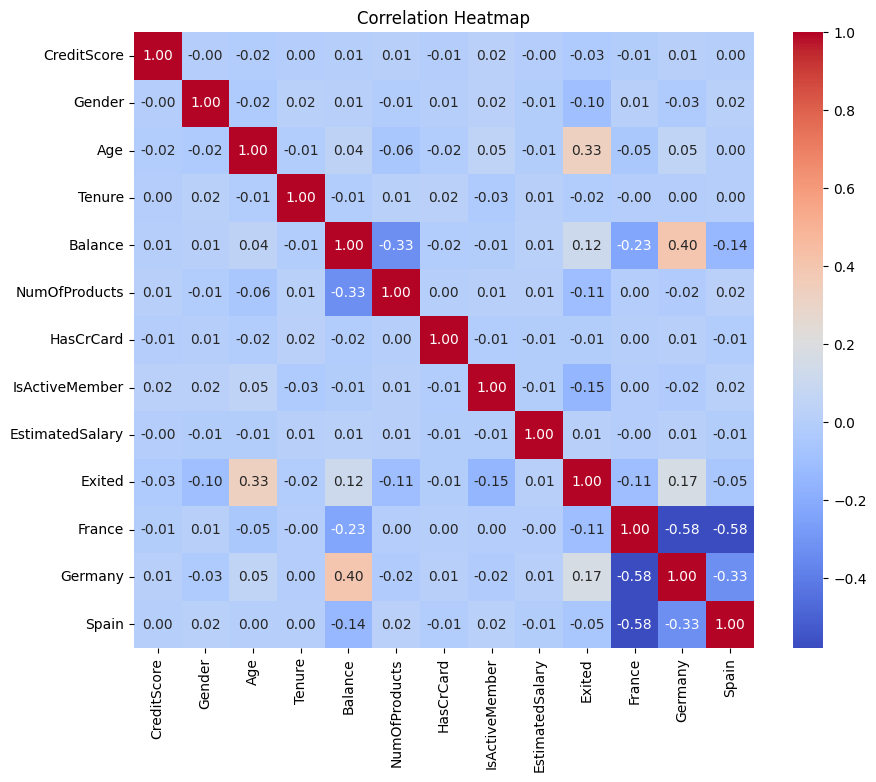

In [115]:
plt.figure(figsize=(10, 8))
sns.heatmap(dfNum.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [56]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Up to here everthing is good. Dataset converted very well. Now I scale all data for machine can understand.

In [57]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models

In [60]:
input_dim = X_train.shape[1]
print(f"input_dim: {input_dim}")

model = Sequential()
model.add(Dense(32, input_dim=input_dim, activation='relu'))
model.add(Dense(16, activation='relu', name='hidden_layer1'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'mse'])

model.summary()

model.fit(X_train, y_train, epochs=150, batch_size=10, validation_data=(X_test, y_test))

input_dim: 12
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 32)                416       
                                                                 
 hidden_layer1 (Dense)       (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 961 (3.75 KB)
Trainable params: 961 (3.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/150
782/782 [==============================] - 4s 4ms/step - loss: 0.4744 - accuracy: 0.7933 - mse: 0.1524 - val_loss: 0.4499 - val_accuracy: 0.7999 - val_mse: 0.1433
Epoch 2/150
782/782 [==============================] - 3s 3ms/step - loss: 0.4137 - accuracy: 0.8243 - mse: 0.1293 - val_loss: 0.4191 - val_accuracy: 0.8245 - val_mse: 0.1310
Epoch 3/150
782/782 [==============================] - 2s 3ms/step - loss: 0.3930 - accuracy: 0.8358 - mse: 0.1222 - val_loss: 0.4048 - val_accuracy: 0.8332 - val_mse: 0.1261
Epoch 4/150
782/782 [==============================] - 2s 3ms/step - loss: 0.3723 - accuracy: 0.8435 - mse: 0.1150 - val_loss: 0.3897 - val_accuracy: 0.8373 - val_mse: 0.1210
Epoch 5/150
782/782 [==============================] - 2s 3ms/step - loss: 0.3593 - accuracy: 0.8482 - mse: 0.1109 - val_loss: 0.3932 - val_accuracy: 0.8342 - val_mse: 0.1220
Epoch 6/150
782/782 [==============================] - 2s 3ms/step - loss: 0.3516 - accuracy: 0.8517 - mse: 0.1081 - val_loss

The model has 1 input, 1 output and 1 hidden layer. The activation function of the input layer and hidden layer was chosen as relu and the activation code of the output layer was chosen as sigmoid. Acc and mse were chosen as the accuracy metrics of the model. We chose adam as the optimisation algorithm and binary_crossentropy as the loss function. Epoch was set as 150. The result of the created model: 
* EPOCH the First: 4s 4ms/step - loss: 0.4744 - accuracy: 0.7933 - mse: 0.1524 - val_loss: 0.4499 - val_accuracy: 0.7999 - val_mse: 0.1433
* EPOCH the Last: 2s 3ms/step - loss: 0.2926 - accuracy: 0.8807 - mse: 0.0888 - val_loss: 0.3986 - val_accuracy: 0.8403 - val_mse: 0.1204

The loss value, which was 0.4744 in the first epoch, became 0.2926 in the last epoch. In order to validate the model, we used the data allocated as a test. On this data set, we see that the loss value decreases from 0.4499 to 0.3986. This is an indication that the model works well. But it is not a good model. We can improve the model by increasing the number of epochs, increasing the number of layers, increasing the number of data or changing the functions.


In [67]:
input_dim = X_train.shape[1]
print(f"input_dim: {input_dim}")

model = Sequential()
model.add(Dense(32, input_dim=input_dim, activation='relu'))
model.add(Dense(16, activation='relu', name='hidden_layer1'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'mse'])

model.summary()

model.fit(X_train, y_train, epochs=350, batch_size=10, validation_data=(X_test, y_test))

input_dim: 12
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 dense_27 (Dense)            (None, 32)                416       
                                                                 
 hidden_layer1 (Dense)       (None, 16)                528       
                                                                 
 dense_28 (Dense)            (None, 1)                 17        
                                                                 
Total params: 961 (3.75 KB)
Trainable params: 961 (3.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/350
782/782 [==============================] - 3s 3ms/step - loss: 0.4609 - accuracy: 0.8005 - mse: 0.1469 - val_loss: 0.4529 - val_accuracy: 0.8091 - val_mse: 0.1428
Epoch 2/350
782/782 [==============================] - 2s 3ms/step - loss: 0.4139 - accuracy: 0.8258 - mse: 0.1292 - val_loss: 0.4365 - val_accuracy: 0.8112 - val_mse: 0.1373
Epoch 3/350
782/782 [==============================] - 2s 3ms/step - loss: 0.3998 - accuracy

This model is similar to the previous one. The model has 1 input, 1 output and 1 hidden layer. The activation function of the input layer and hidden layer is relu and the activation code of the output layer is sigmoid. Acc and mse were chosen as the accuracy metrics of the model. We chose adam as the optimisation algorithm and binary_crossentropy as the loss function. 
The number of epochs was increased from 150 to 350 to see the effect on the model accuracy. The result of the created model: 
* EPOCH the First: 3s 3ms/step - loss: 0.4609 - accuracy: 0.8005 - mse: 0.1469 - val_loss: 0.4529 - val_accuracy: 0.8091 - val_mse: 0.1428

* EPOCH the Last:  2s 3ms/step - loss: 0.2753 - accuracy: 0.8843 - mse: 0.0841 - val_loss: 0.4421 - val_accuracy: 0.8337 - val_mse: 0.1288

The loss value of 0.4609 in the first epoch became 0.2753 in the last epoch. On the validation dataset, we see that the loss value decreased from 0.4529 to 0.442186. We could not get the model we wanted by increasing the number of epochs.

In [62]:
input_dim = X_train.shape[1]
print(f"input_dim: {input_dim}")

model = Sequential()
model.add(Dense(32, input_dim=input_dim, activation='relu'))
model.add(Dense(16, activation='relu', name='hidden_layer1'))
model.add(Dense(1, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'mse'])

model.summary()

model.fit(X_train, y_train, epochs=150, batch_size=10, validation_data=(X_test, y_test))

input_dim: 12
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 32)                416       
                                                                 
 hidden_layer1 (Dense)       (None, 16)                528       
                                                                 
 dense_18 (Dense)            (None, 1)                 17        
                                                                 
Total params: 961 (3.75 KB)
Trainable params: 961 (3.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/150
782/782 [==============================] - 3s 3ms/step - loss: 0.4535 - accuracy: 0.1962 - mse: 0.8038 - val_loss: 0.4386 - val_accuracy: 0.2185 - val_mse: 0.7815
Epoch 2/150
782/782 [==============================] - 2s 3ms/step - loss: 0.4093 - accuracy: 0.196

This model is similar to the previous one. The model has 1 input, 1 output and 1 hidden layer. The activation function of the input layer and hidden layer is relu. Acc and mse were chosen as the accuracy metrics of the model. We chose adam as the optimisation algorithm and binary_crossentropy as the loss function.  The activation function of the output layer was chosen as softmax to see if the model will work better.
Epoch was set to 150. The result of the created model: 
* EPOCH the First:  3s 3ms/step - loss: 0.4535 - accuracy: 0.1962 - mse: 0.8038 - val_loss: 0.4386 - val_accuracy: 0.2185 - val_mse: 0.7815
* EPOCH the Last: 2s 3ms/step - loss: 0.2967 - accuracy: 0.1962 - mse: 0.8038 - val_loss: 0.3867 - val_accuracy: 0.2185 - val_mse: 0.7815

The loss value, which was 0.4535 in the first epoch, became 0.2985 in the last epoch. We see that the loss value decreased from 0.4339 to 0.3922 on the validation data set. We can see that the acc value remains at 19% and the mse value has not changed since the first epoch.

In [68]:
input_dim = X_train.shape[1]
print(f"input_dim: {input_dim}")

model = Sequential()
model.add(Dense(64, input_dim=input_dim, activation='relu'))
model.add(Dense(32, activation='relu', name='hidden_layer1'))
model.add(Dense(16, activation='relu', name='hidden_layer2'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'mse'])

model.summary()

model.fit(X_train, y_train, epochs=350, batch_size=10, validation_data=(X_test, y_test))

input_dim: 12
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 64)                832       
                                                                 
 hidden_layer1 (Dense)       (None, 32)                2080      
                                                                 
 hidden_layer2 (Dense)       (None, 16)                528       


                                                                 
 dense_30 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3457 (13.50 KB)
Trainable params: 3457 (13.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/350
782/782 [==============================] - 3s 2ms/step - loss: 0.4422 - accuracy: 0.8139 - mse: 0.1394 - val_loss: 0.4186 - val_accuracy: 0.8296 - val_mse: 0.1310
Epoch 2/350
782/782 [==============================] - 2s 2ms/step - loss: 0.3784 - accuracy: 0.8422 - mse: 0.1173 - val_loss: 0.3854 - val_accuracy: 0.8408 - val_mse: 0.1181
Epoch 3/350
782/782 [==============================] - 2s 2ms/step - loss: 0.3543 - accuracy: 0.8537 - mse: 0.1085 - val_loss: 0.3848 - val_accuracy: 0.8398 - val_mse: 0.1176
Epoch 4/350
782/782 [==============================] - 2s 2ms/step - loss: 0.3486 - accuracy: 0.8590 - mse: 0.1

In this model, we increased the number of layers by one and set the output layer activation function as sigmoid.
We chose the number of epochs as 350. The result of the model created: 
* EPOCH the First:   3s 2ms/step - loss: 0.4422 - accuracy: 0.8139 - mse: 0.1394 - val_loss: 0.4186 - val_accuracy: 0.8296 - val_mse: 0.1310
* EPOCH the Last: 2s 2ms/step - loss: 0.1448 - accuracy: 0.9386 - mse: 0.0444 - val_loss: 1.0669 - val_accuracy: 0.8055 - val_mse: 0.1581

The loss value, which was 0.4422 in the first epoch, became 0.1448 in the last epoch. On the validation data set, we see that the loss value increased from 0.4186 to 1.0669. 
Although the Acc value of 93% and the mse value of 0.044 on the training data show that the model works almost very well with a decrease in the loss value, it should be noted that the loss value in the validation data is high.
We can see that the loss value decreases while training the model. Towards the end of the epoch, the loss value increases again. We can see that the number of epochs is high here and we can get better results when we reduce the number of epochs.

In order to see this, I want to create a graph by recording the data I obtained in each epoch. 

In [74]:
input_dim = X_train.shape[1]
print(f"input_dim: {input_dim}")

model = Sequential()
model.add(Dense(64, input_dim=input_dim, activation='relu'))
model.add(Dense(32, activation='relu', name='hidden_layer1'))
model.add(Dense(16, activation='relu', name='hidden_layer2'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy', 'mse'])

model.summary()

history = model.fit(X_train, y_train, epochs=550, batch_size=10, validation_data=(X_test, y_test))

input_dim: 12
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 64)                832       
                                                                 
 hidden_layer1 (Dense)       (None, 32)                2080      
                                                                 
 hidden_layer2 (Dense)       (None, 16)                528       
                                                                 
 dense_34 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3457 (13.50 KB)
Trainable params: 3457 (13.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/550
782/782 [==============================] - 4s 4ms/step - loss: 0.4422 - accuracy: 0.8131 - mse: 0.1398 - val_loss: 0.4339 - v

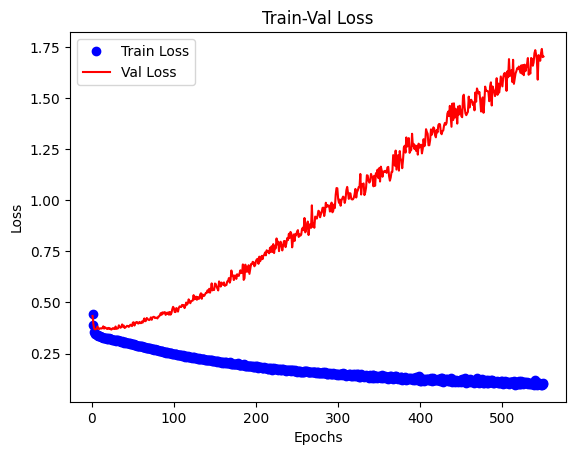

In [75]:
loss_values = history.history['loss']  
val_loss_values = history.history['val_loss'] 

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Train Loss')
plt.plot(epochs, val_loss_values, 'r', label='Val Loss')
plt.title('Train-Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


As we can see in this graph, the model is overfitting. The reasons for this may be the hyperparameters used and the complexity of the model.  Finally, I will change the optimisation algorithm to AdaGrad and try again.

In [76]:
input_dim = X_train.shape[1]
print(f"input_dim: {input_dim}")

model = Sequential()
model.add(Dense(64, input_dim=input_dim, activation='relu'))
model.add(Dense(32, activation='relu', name='hidden_layer1'))
model.add(Dense(16, activation='relu', name='hidden_layer2'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='AdaGrad', metrics=['accuracy', 'mse'])

model.summary()

history = model.fit(X_train, y_train, epochs=550, batch_size=10, validation_data=(X_test, y_test))

input_dim: 12
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 64)                832       
                                                                 
 hidden_layer1 (Dense)       (None, 32)                2080      
                                                                 
 hidden_layer2 (Dense)       (None, 16)                528       
                                                                 
 dense_36 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3457 (13.50 KB)
Trainable params: 3457 (13.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/550
782/782 [==============================] - 3s 3ms/step - loss: 0.5651 - accuracy: 0.8029 - mse: 0.1880 - val_loss: 0.5318 - v

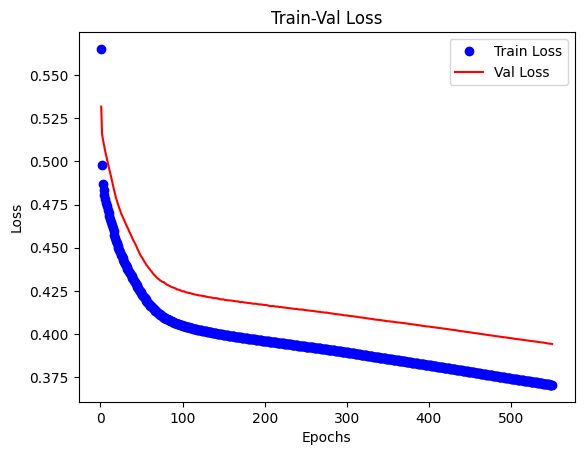

In [77]:
loss_values = history.history['loss']  
val_loss_values = history.history['val_loss'] 

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Train Loss')
plt.plot(epochs, val_loss_values, 'r', label='Val Loss')
plt.title('Train-Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [82]:
input_dim = X_train.shape[1]
print(f"input_dim: {input_dim}")

model = Sequential()
model.add(Dense(128, input_dim=input_dim, activation='relu'))
model.add(Dense(64, activation='relu', name='hidden_layer1'))
model.add(Dense(32, activation='relu', name='hidden_layer2'))
model.add(Dense(16, activation='relu', name='hidden_layer3'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='AdaGrad', metrics=['accuracy', 'mse'])

model.summary()

history_3HL = model.fit(X_train, y_train, epochs=750, batch_size=10, validation_data=(X_test, y_test))

input_dim: 12
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 128)               1664      
                                                                 
 hidden_layer1 (Dense)       (None, 64)                8256      
                                                                 
 hidden_layer2 (Dense)       (None, 32)                2080      
                                                                 
 hidden_layer3 (Dense)       (None, 16)                528       


                                                                 
 dense_42 (Dense)            (None, 1)                 17        
                                                                 
Total params: 12545 (49.00 KB)
Trainable params: 12545 (49.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/750
782/782 [==============================] - 3s 3ms/step - loss: 0.5459 - accuracy: 0.8038 - mse: 0.1797 - val_loss: 0.5118 - val_accuracy: 0.7815 - val_mse: 0.1661
Epoch 2/750
782/782 [==============================] - 2s 2ms/step - loss: 0.4803 - accuracy: 0.8038 - mse: 0.1528 - val_loss: 0.5046 - val_accuracy: 0.7815 - val_mse: 0.1641
Epoch 3/750
782/782 [==============================] - 2s 2ms/step - loss: 0.4734 - accuracy: 0.8038 - mse: 0.1507 - val_loss: 0.4990 - val_accuracy: 0.7815 - val_mse: 0.1622
Epoch 4/750
782/782 [==============================] - 2s 2ms/step - loss: 0.4685 - accuracy: 0.8038 - mse: 0

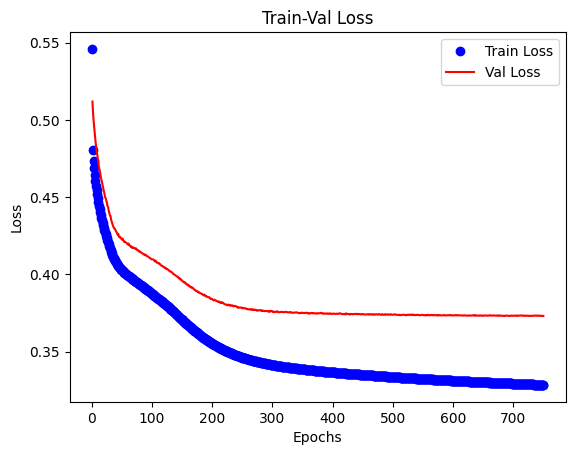

In [83]:
loss_values = history_3HL.history['loss']  
val_loss_values = history_3HL.history['val_loss'] 

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Train Loss')
plt.plot(epochs, val_loss_values, 'r', label='Val Loss')
plt.title('Train-Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

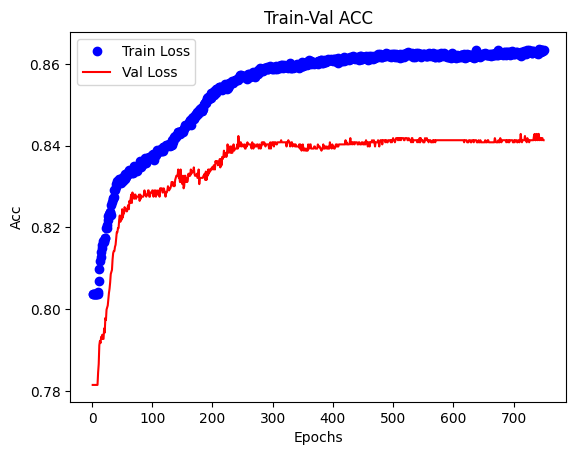

In [91]:
loss_values = history_3HL.history['accuracy']  
val_loss_values = history_3HL.history['val_accuracy'] 

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Train Loss')
plt.plot(epochs, val_loss_values, 'r', label='Val Loss')
plt.title('Train-Val ACC')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

The training with AdaGrad seems to have learnt more accurately than Adam. When we look at the graphs, we can see that we can get the best result at epochs between 200 and 300.

# Finally 
* 1 input, 1 output and 3 hidden layers, 
* activation function of hidden layers relu, 
* output layer sigmoid, 
* loss function binary_crossentropy,,
* optimiser also AdaGrad 
we have created a model.